<a href="https://colab.research.google.com/github/rishsoraganvi/Lab-Practical-2023-2027/blob/main/IP_%26_CV_Lab_Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment-1 :**
# Simulation and Display of an Image, Negative of an Image (Binary & Grey Scale)

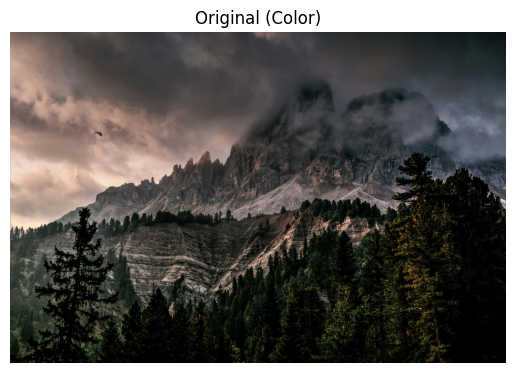

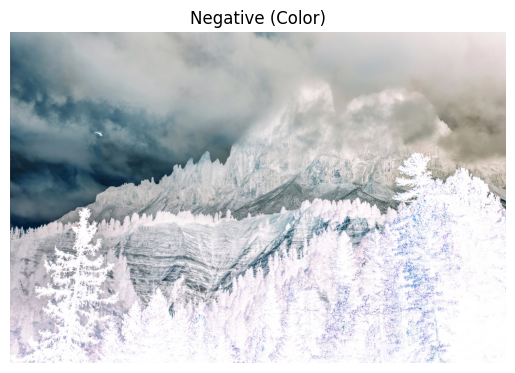

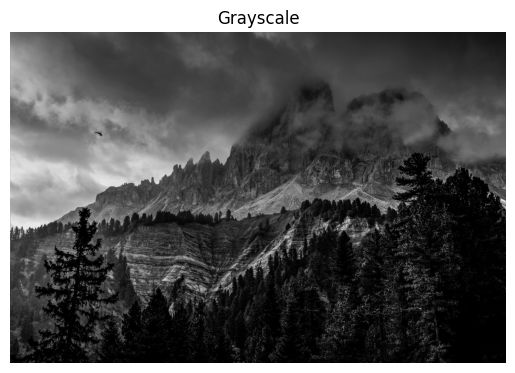

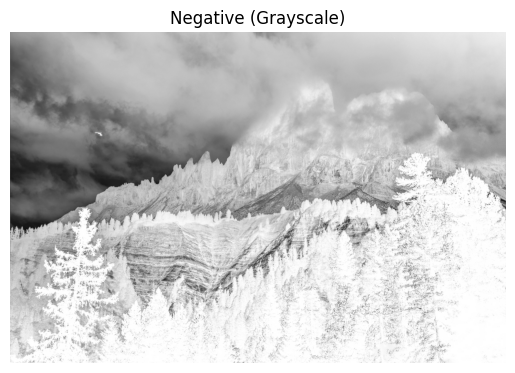

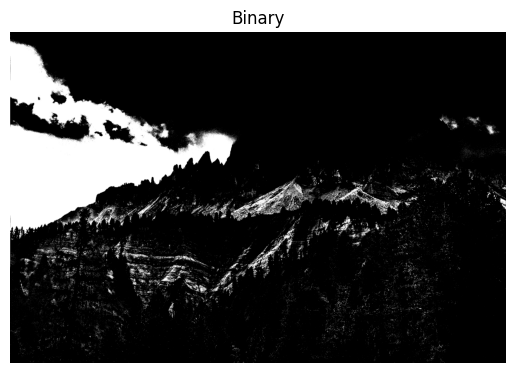

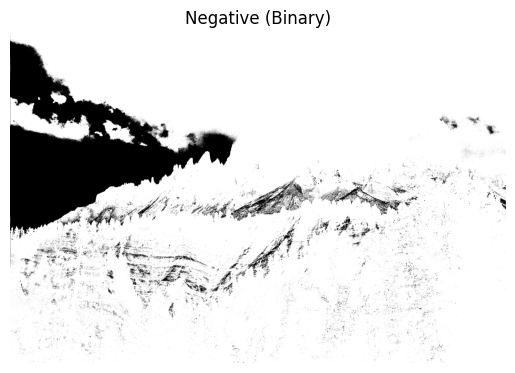

In [42]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/pexels-eberhardgross-640781.jpg"   # change this to your image path/name

img = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original (Color)")
plt.axis("off")
plt.show()

neg = 255 - img
plt.imshow(cv2.cvtColor(neg, cv2.COLOR_BGR2RGB))
plt.title("Negative (Color)")
plt.axis("off")
plt.show()

gray = cv2.imread(img_path, 0)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")
plt.show()

gray_neg = 255 - gray
plt.imshow(gray_neg, cmap="gray")
plt.title("Negative (Grayscale)")
plt.axis("off")
plt.show()

_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap="gray")
plt.title("Binary")
plt.axis("off")
plt.show()

binary_neg = 255 - binary
plt.imshow(binary_neg, cmap="gray")
plt.title("Negative (Binary)")
plt.axis("off")
plt.show()


**Experiment-2**
#Implementation of Image Transformation

### Image Translation
**Explanation:**  
Image translation shifts an image from one position to another. Here, the image is shifted 100 pixels to the right and 50 pixels downward using a translation matrix and the warpAffine function.


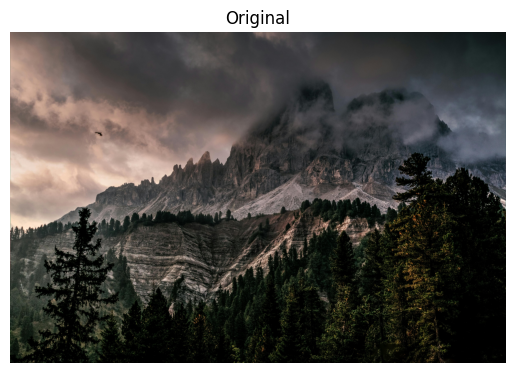

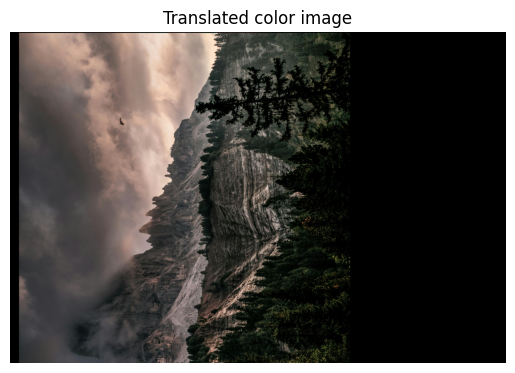

In [43]:
# TRANSLATION of the image

import cv2
import numpy as np
import matplotlib.pyplot as plt

img_path ="/content/pexels-eberhardgross-640781.jpg"
img = cv2.imread(img_path)

rows, cols,ch = img.shape
M = np.float32([[0, 1, 100], [1, 0, 20]])
translated_img = cv2.warpAffine(img, M, (cols, rows))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")
plt.show()

plt.imshow(cv2.cvtColor(translated_img, cv2.COLOR_BGR2RGB))
plt.title("Translated color image")
plt.axis("off")
plt.show()

### Image Reflection
**Explanation:**  
Image reflection flips the image vertically. The scaling factor along the y-axis is set to -1, which causes the image to flip upside down. The image is repositioned using the number of rows.


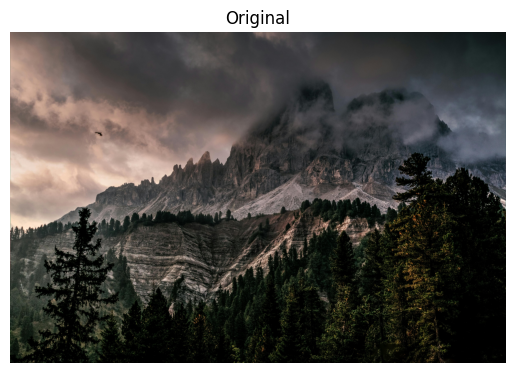

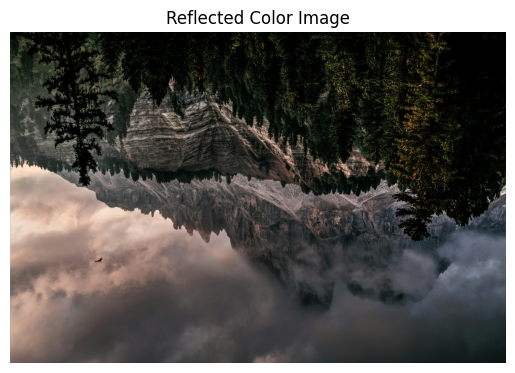

In [44]:
# FLIP with respect to AXIS

import cv2
import pandas as pd
import matplotlib.pyplot as plt

img_path="/content/pexels-eberhardgross-640781.jpg"
img =cv2.imread(img_path)

rows,cols,ch = img.shape
M = np.float32([
    [1,0,0],
     [0,-1,rows],
      [0,0,1]
    ])

reflected_img=cv2.warpPerspective(img,M,(cols,rows))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")
plt.show()

plt.imshow(cv2.cvtColor(reflected_img, cv2.COLOR_BGR2RGB))
plt.title("Reflected Color Image")
plt.axis("off")
plt.show()


### Image Rotation
**Explanation:**  
The image is rotated by 30 degrees in the anticlockwise direction about its center. A scaling factor of 0.6 is used to reduce the image size during rotation.


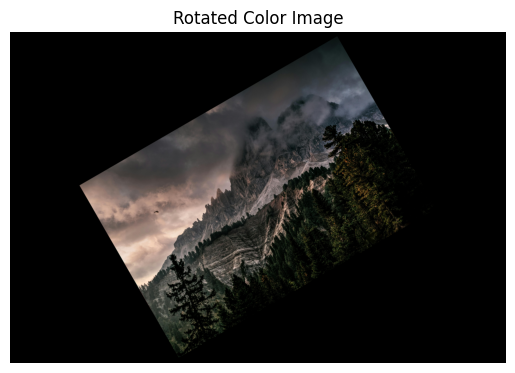

In [50]:
# ROTATION of the image

import cv2
import pandas as pd
import matplotlib.pyplot as plt

img_path="/content/pexels-eberhardgross-640781.jpg"
img =cv2.imread(img_path)

rows, cols, ch = img.shape

rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 0.6)
rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title("Rotated Color Image")
plt.axis("off")
plt.show()

### Image Scaling
**Explanation:**  
Image scaling resizes the image. The image is enlarged by a factor of 1.5 in both x and y directions using cubic interpolation for better quality.


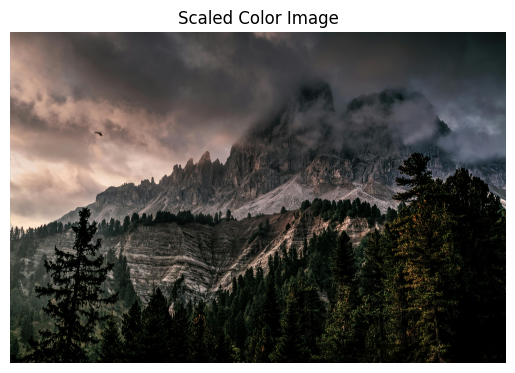

In [72]:
scaled_img = cv2.resize(img, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)

plt.imshow(cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB))
plt.title("Scaled Color Image")
plt.axis("off")
plt.show()

### Image Cropping
**Explanation:**  
Cropping removes unwanted outer regions of the image. A 200x200 pixel region is extracted using array slicing.


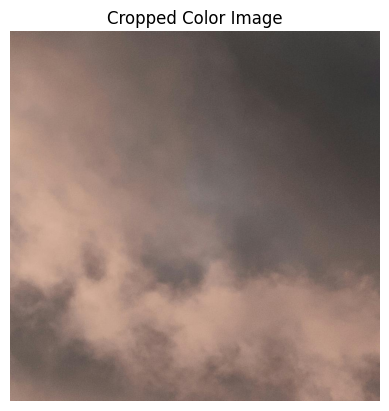

In [66]:
cropped_img = img[100:1100, 100:1100]

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.title("Cropped Color Image")
plt.axis("off")
plt.show()

### Image Shearing in X-Axis
**Explanation:**  
In x-axis shearing, horizontal lines remain unchanged while vertical lines are shifted sideways. A shearing factor of 0.5 is used.


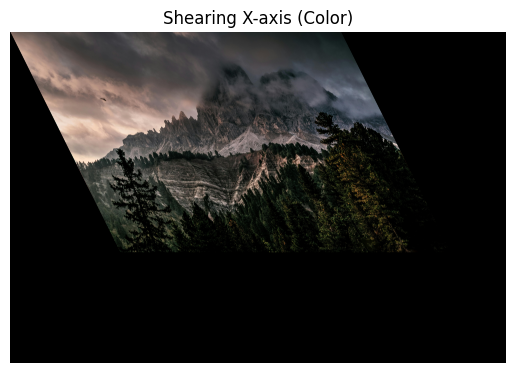

In [48]:
rows, cols, ch = img.shape

M = np.float32([
    [1, 0.5, 0],
    [0, 1,   0],
    [0, 0,   1]
])

shear_x = cv2.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

plt.imshow(cv2.cvtColor(shear_x, cv2.COLOR_BGR2RGB))
plt.title("Shearing X-axis (Color)")
plt.axis("off")
plt.show()

### Image Shearing in Y-Axis
**Explanation:**  
In y-axis shearing, vertical lines remain fixed while horizontal lines are shifted. A shearing factor of 0.5 is used.


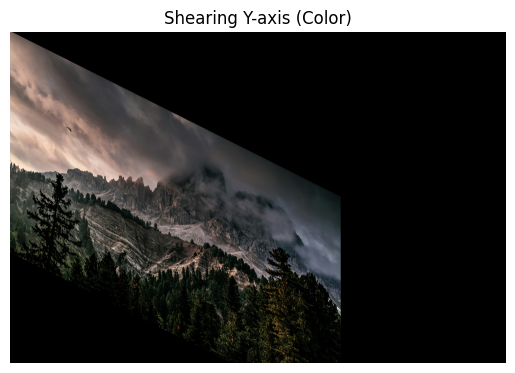

In [49]:
rows, cols, ch = img.shape

M = np.float32([
    [1,   0, 0],
    [0.5, 1, 0],
    [0,   0, 1]
])

shear_y = cv2.warpPerspective(img, M, (int(cols*1.5), int(rows*1.5)))

plt.imshow(cv2.cvtColor(shear_y, cv2.COLOR_BGR2RGB))
plt.title("Shearing Y-axis (Color)")
plt.axis("off")
plt.show()

### Conclusion
In this experiment, different image transformation techniques were implemented successfully using OpenCV. These techniques are essential in image preprocessing and computer vision applications.
